# Flight Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel(r'C:\Users\Administrator\Desktop\DataTrained_project\Evaluation\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_test=pd.read_excel(r'C:\Users\Administrator\Desktop\DataTrained_project\Evaluation\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
df_train.shape

(10683, 11)

here we have 10683 rows and 11 column

In [74]:
df_test.shape

(2671, 11)

here we have 2671 rows and 10 column

In [7]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

here we can see we have one int and rest objecet datatype

In [8]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

here we have all object type of datatype

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


here we can see no null value and datatype also

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


here we can see no null value and datatype

In [11]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

here we can see column of train datasets

In [12]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

here we can see column of test datasets

In [13]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 1 missing values in column 'Route' and 'Total_Stops' of Train dataset.

<AxesSubplot:>

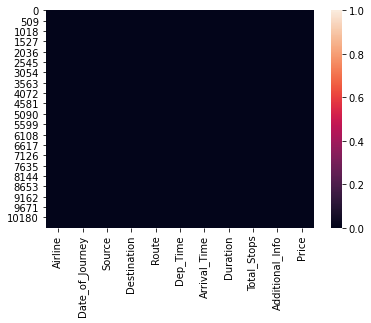

In [14]:
sns.heatmap(df_train.isnull())

There is only price values in df datasets which is null

In [15]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

there is no null value present

<AxesSubplot:>

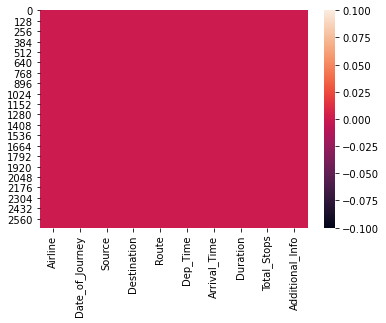

In [16]:
sns.heatmap(df_test.isnull())

with graph also we can see no null value is present

In [17]:
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)

In [18]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_train['Route']=imp.fit_transform(df_train['Route'].values.reshape(-1,1))
df_train['Total_Stops']=imp.fit_transform(df_train['Total_Stops'].values.reshape(-1,1))

In [19]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

we can see now no value is null

# EDA

<AxesSubplot:xlabel='Price', ylabel='Density'>

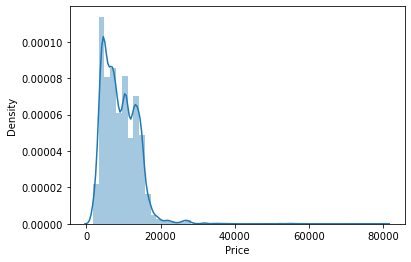

In [20]:
sns.distplot(df_train['Price'])

The target variable, 'Price' is not distributed normally.

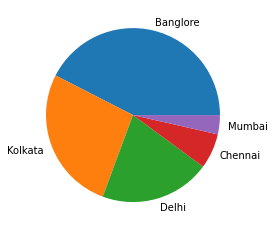

In [21]:
plt.pie(df_train['Source'].value_counts(), labels=df_train['Source'].unique(),shadow=False)
plt.show()

here we can see baglore is highest mumbaie is at lowest

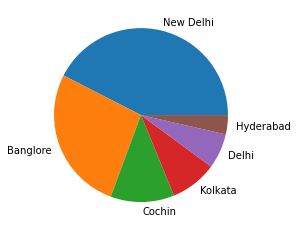

In [22]:
plt.pie(df_train['Destination'].value_counts(), labels=df_train['Destination'].unique(),shadow=False)
plt.show()

Here we can observe new delh is highest hyderbad at lowest

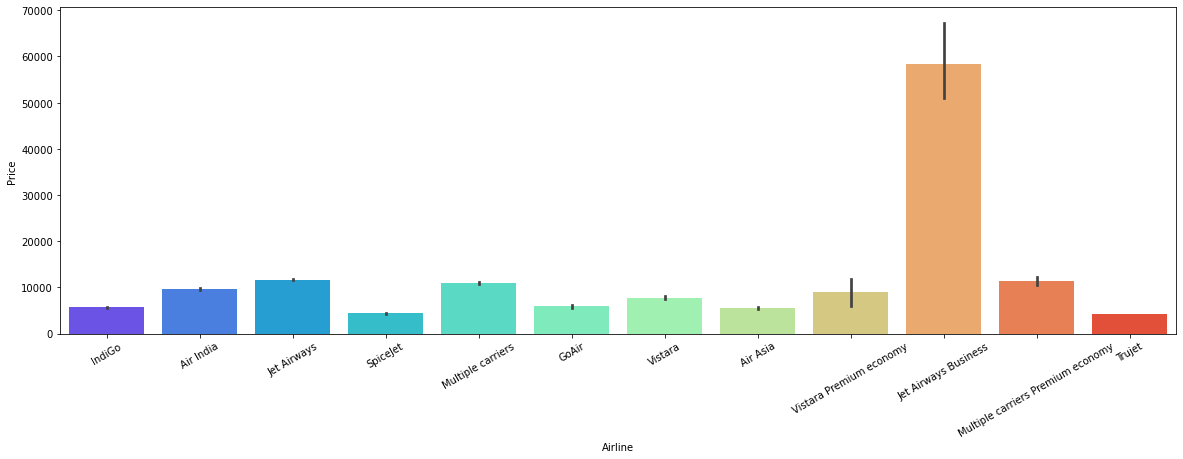

In [77]:
plt.figure(figsize=(20,6))
sns.barplot(x="Airline",y="Price",data=df_train,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

here we can see that vistara premium is at high ans spiceject ,goair etc at low

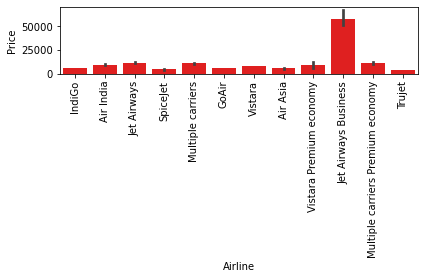

In [79]:
sns.barplot(x=df_train['Airline'],y=df_train['Price'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

The Maximum priced 'Airline' is Jet airways business

In [39]:
df_train["Dep_Hour"]=pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"]=pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop(["Dep_Time"],axis=1,inplace=True)

In [42]:
df_train["Arrival_min"]=pd.to_datetime(df_train["Arrival_Time"]).dt.minute
df_train["Arrival_Hour"]=pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train.drop(["Arrival_Time"],axis=1,inplace=True)

In [43]:
duration=list(df_train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2: 
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m" 
            duration[i]= "0h " + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range (len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [45]:
df_train["Duration_hours"]=duration_hours
df_train["Duration_min"]=duration_mins

In [46]:
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_min,Arrival_min,Arrival_Hour,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,19,55,25,22,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,20,45,20,23,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,8,20,20,11,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,11,30,10,14,2,40


In [47]:
df_train.drop(["Duration"], axis=1,inplace=True)

In [48]:
mean_price=np.mean(df_train["Price"])

In [50]:
Airline=df_train["Airline"]
Airline=pd.get_dummies(Airline,drop_first=True)
Source=df_train["Source"]
Source=pd.get_dummies(Source,drop_first=True)
Destination=df_train["Destination"]
Destination=pd.get_dummies(Destination,drop_first=True)
df_train.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [51]:
df_train.replace({"non-stop":0,"1 Stop":1,"2 Stops":2,"3 Stops":3,"4 Stops":4},inplace=True)
df_train

,Airline,Source,Destination,Total_Stops,Price,Dep_Hour,Dep_min,Arrival_min,Arrival_Hour,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,22,20,10,1,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,50,15,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,25,25,4,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,18,5,30,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,16,50,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,19,55,25,22,2,30
10679,Air India,Kolkata,Banglore,0,4145,20,45,20,23,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,8,20,20,11,3,0
10681,Vistara,Banglore,New Delhi,0,12648,11,30,10,14,2,40


In [52]:
train=pd.concat([df_train,Airline,Source,Destination,],axis=1)

In [53]:
train.drop(["Airline","Destination","Source"],axis=1,inplace=True)

In [55]:
df_test.dropna(inplace=True)
print(df_test.isnull().values.any())
print('\n')
print(df_test.isnull().sum())

False


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [56]:
df_test["Journey_date"]=pd.to_datetime(df_test["Date_of_Journey"],format="%d/%m/%Y").dt.day
df_test["Journey_month"]=pd.to_datetime(df_test["Date_of_Journey"],format="%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"],axis=1,inplace=True)
df_test["Dep_Hour"]=pd.to_datetime(df_test["Dep_Time"]).dt.hour
#fetching miniutes
df_test["Dep_min"]=pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"],axis=1,inplace=True)
df_test["Arrival_min"]=pd.to_datetime(df_test["Arrival_Time"]).dt.minute
df_test["Arrival_Hour"]=pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test.drop(["Arrival_Time"],axis=1,inplace=True)

In [57]:
duration=list(df_test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2: 
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m" #add 0 mim
        else:
            duration[i]= "0h " + duration[i] #add 0 hour
            
duration_hours=[]
duration_mins=[]
for i in range (len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
#adding duration hour and duration min list to train_data
df_test["Duration_hours"]=duration_hours
df_test["Duration_min"]=duration_mins
#droping duration column as it no use
df_test.drop(["Duration"], axis=1,inplace=True)

In [58]:
Airline=df_test["Airline"]
Airline=pd.get_dummies(Airline,drop_first=True)
Source=df_test["Source"]
Source=pd.get_dummies(Source,drop_first=True)
Destination=df_test["Destination"]
Destination=pd.get_dummies(Destination,drop_first=True)
#we can drop some of the column
df_test.drop(["Route","Additional_Info"],axis=1,inplace=True)
df_test.replace({"non-stops":0,"1 Stops":1,"2 Stops":2,"3 Stops":3,"4 Stops":4},inplace=True)
test=pd.concat([df_test,Airline,Source,Destination],axis=1)
#now we are droping some column in airline,destination,source
test.drop(["Airline","Destination","Source"],axis=1,inplace=True)

In [60]:
test

,Total_Stops,Journey_date,Journey_month,Dep_Hour,Dep_min,Arrival_min,Arrival_Hour,Duration_hours,Duration_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1 stop,6,6,17,30,25,4,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1 stop,5,12,6,20,20,10,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1 stop,21,5,19,15,0,19,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,21,5,8,0,0,21,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,non-stop,24,6,23,55,45,2,2,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1 stop,6,6,20,30,25,20,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,non-stop,27,3,14,20,55,16,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1 stop,3,6,21,50,25,4,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1 stop,3,6,4,0,15,19,15,15,1,...,0,0,1,0,0,1,0,0,0,0


In [61]:
df_train.describe()

,Price,Dep_Hour,Dep_min,Arrival_min,Arrival_Hour,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.490686,24.411214,24.690630,13.348778,10.246092,28.327717
std,4611.359167,5.748650,18.767980,16.506036,6.859125,8.495414,16.945400
min,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,8.000000,5.000000,10.000000,8.000000,2.000000,15.000000
50%,8372.000000,11.000000,25.000000,25.000000,14.000000,8.000000,30.000000
75%,12373.000000,18.000000,40.000000,35.000000,19.000000,15.000000,45.000000
max,79512.000000,23.000000,55.000000,55.000000,23.000000,47.000000,55.000000


In [62]:
train_cor=df_train.corr()
train_cor

,Price,Dep_Hour,Dep_min,Arrival_min,Arrival_Hour,Duration_hours,Duration_min
Price,1.000000,0.006819,-0.024492,-0.086155,0.024264,0.508672,-0.124874
Dep_Hour,0.006819,1.000000,-0.024806,0.067909,0.005215,0.002783,-0.023746
Dep_min,-0.024492,-0.024806,1.000000,-0.017594,0.043054,-0.021946,0.092548
Arrival_min,-0.086155,0.067909,-0.017594,1.000000,-0.154362,-0.074439,0.151626
Arrival_Hour,0.024264,0.005215,0.043054,-0.154362,1.000000,0.055180,-0.118345
Duration_hours,0.508672,0.002783,-0.021946,-0.074439,0.055180,1.000000,-0.126355
Duration_min,-0.124874,-0.023746,0.092548,0.151626,-0.118345,-0.126355,1.000000


<AxesSubplot:>

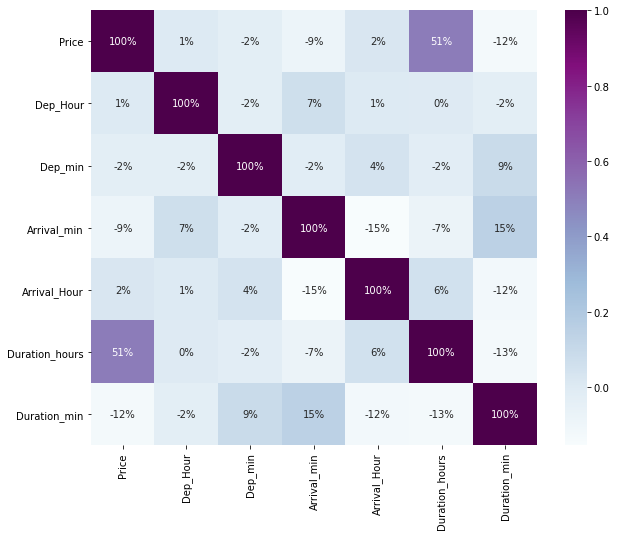

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(train_cor,annot=True,fmt=".0%",cmap="BuPu")

In [63]:
df_train.drop(["Total_Stops"],axis=1,inplace=True)
df_test.drop(["Total_Stops"],axis=1,inplace=True)

In [65]:
train.drop(["Total_Stops"],axis=1,inplace=True)
test.drop(["Total_Stops"],axis=1,inplace=True)

# Removing outliers

In [66]:
from scipy.stats import zscore
z=np.abs(zscore(train))

In [67]:
threshold=3
print(np.where(z>3))
train_new=train[(z<3).all(axis=1)]

(array([    0,     4,     5, ..., 10677, 10681, 10681], dtype=int64), array([26, 26, 14, ..., 14, 16, 26], dtype=int64))


In [68]:
x=train_new.drop(columns=["Price"],axis=1)
y=train_new["Price"]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#importing boosting model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [71]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("score of",m,"is:")
    print("MAE:",mean_absolute_error(y_test,predm))
    print("MSE:",mean_squared_error(y_test,predm))
    print("RSME:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2_Score:",r2_score(y_test,predm))
    print("*****************************************************************************************")
    print('/n') 

score of LinearRegression() is:
MAE: 2055.433676388597
MSE: 6706471.653280002
RSME: 2589.6856282722815
R2_Score: 0.5182809448841685
*****************************************************************************************
/n
score of Lasso() is:
MAE: 2054.660811731573
MSE: 6708643.983820635
RSME: 2590.1050140526418
R2_Score: 0.5181249085852719
*****************************************************************************************
/n
score of Ridge() is:
MAE: 2054.3940063499517
MSE: 6707989.549185101
RSME: 2589.97867736109
R2_Score: 0.518171915961216
*****************************************************************************************
/n
score of ElasticNet() is:
MAE: 2183.792915210618
MSE: 7317889.983763037
RSME: 2705.1598813680193
R2_Score: 0.47436338649163623
*****************************************************************************************
/n
score of SVR() is:
MAE: 3071.9271293349866
MSE: 12854342.703029877
RSME: 3585.295343905419
R2_Score: 0.0766856044176133
*********

In [72]:
#CROSS VAL SCORE FOR ALL ALGORITHM
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for n in model:
    score=cross_val_score(n,x,y,cv=10,scoring="r2")
    print("Model",n)
    print("Score",score)
    print("Mean score",score.mean())
    print("Standard Deviation",score.std())
    print("********************************************************************************************")
    print('/n')

Model LinearRegression()
Score [0.49478869 0.51653173 0.50401399 0.48100063 0.51469549 0.50797983
 0.50102912 0.51426618 0.5271211  0.501479  ]
Mean score 0.5062905764153802
Standard Deviation 0.012262913100047214
********************************************************************************************
/n
Model Lasso()
Score [0.49470055 0.51702905 0.50412429 0.48132047 0.51455095 0.50799821
 0.5011023  0.51432596 0.52718263 0.50202775]
Mean score 0.5064362153286666
Standard Deviation 0.012226674372208325
********************************************************************************************
/n
Model Ridge()
Score [0.4947806  0.51689039 0.50412758 0.48138127 0.51461492 0.50791604
 0.50106477 0.51427782 0.52720291 0.50212926]
Mean score 0.5064385559276219
Standard Deviation 0.012196117835965511
********************************************************************************************
/n
Model ElasticNet()
Score [0.46163132 0.47983038 0.47252643 0.43771834 0.48544072 0.47695303


# RandomForestRegresor gives the best score

In [73]:
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[400,500,600,700],"max_depth":[4,5,6,15,20]}
rfc=RandomForestRegressor()

clf=GridSearchCV(rfc,parameters)
clf.fit(x,y)
print(clf.best_params_)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features="auto",max_depth=20)
rf.fit(x_train,y_train)
print("Score:",rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print("\n")

print("Mean_Squared_error:",mean_squared_error(y_test,predrf))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predrf)))
print("\n")
print("r2score:",r2_score(y_test,predrf))
print("\n")

{'max_depth': 15, 'n_estimators': 500}
Score: 0.7525713754226763


Mean_Squared_error: 4164233.25124397
Root mean squared error: 2040.645302654033


r2score: 0.7008873501925439




# Saving the model

In [76]:
import joblib
joblib.dump(rfc,"final_Flight_Price_Prediction_Project.pkl")

['final_Flight_Price_Prediction_Project.pkl']